# 03.02 - SUPERVISED ALGORITHMS

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [3]:
from sklearn.datasets import * #Crear datasets sinteticos
import numpy as np
from local.lib import mlutils
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

##Aclaración
*Las tareas de regresiones predicen variables continuas, en clasificación es una variable discreta.*

## SUPERVISED ALGORITHMS

- We are given $X$ and $y$


In [60]:
from sklearn.tree import DecisionTreeClassifier
X,y = make_moons(400, noise=0.2) #Matriz de 400x2
#X,y = make_circles(400, noise=0.1)
X.shape, y.shape

((400, 2), (400,))

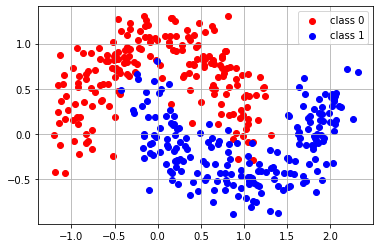

In [61]:
## KEEPOUTPUT
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="red", label="class 0")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="blue", label="class 1")
plt.legend();
plt.grid();

In [62]:
X[:10]

array([[ 1.71013103,  0.43633979],
       [-0.18727825,  0.31331653],
       [-0.77577675,  0.89888427],
       [ 0.52652311,  0.86439623],
       [ 1.04624665,  0.16703435],
       [ 1.817931  , -0.04213772],
       [ 0.40858042, -0.53237051],
       [ 0.70090297, -0.11208257],
       [-0.10827795,  1.20404753],
       [ 1.83069897, -0.06591207]])

In [83]:
X[:,0][:10] #10 primeros de la columna 0

array([ 0.93112701,  0.76438348, -0.82459298,  0.37151021,  0.19645447,
        0.9844802 ,  0.65544274,  0.27686271, -0.66469314, -0.49128647])

In [63]:
y[:10]

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

(array([ 7., 15., 12., 17., 28., 16., 15.,  4., 23.,  6., 15., 12.,  7.,
        11., 11., 10., 12.,  8., 12., 12.,  8., 14., 12., 14., 17., 29.,
        19., 15., 13.,  6.]),
 array([-1.08820695, -1.01625717, -0.94430739, -0.87235761, -0.80040784,
        -0.72845806, -0.65650828, -0.58455851, -0.51260873, -0.44065895,
        -0.36870918, -0.2967594 , -0.22480962, -0.15285985, -0.08091007,
        -0.00896029,  0.06298949,  0.13493926,  0.20688904,  0.27883882,
         0.35078859,  0.42273837,  0.49468815,  0.56663792,  0.6385877 ,
         0.71053748,  0.78248725,  0.85443703,  0.92638681,  0.99833659,
         1.07028636]),
 <BarContainer object of 30 artists>)

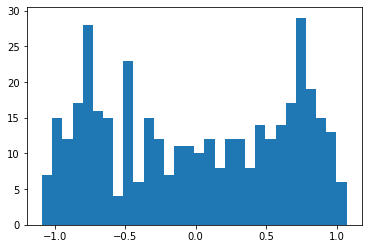

In [88]:
plt.hist(X[:,0], bins=30 )

## Clasificador Lineal

**Hiperplanos**: 
Cualquier cosa lineal en 1, 2 o 3 dimensiones

**El clasificador lineal genera hiperplanos**

El algoritmo supone que la fronteras son lineales

In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() #Crea el algoritmo
lr.fit(X,y) #Calibracion del modelo
lr.score(X,y) #Porcentaje de acierto

0.885

In [65]:
preds=lr.predict(X) #Aqui se hace la prediccion
preds[:20]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [66]:
y[:20]

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

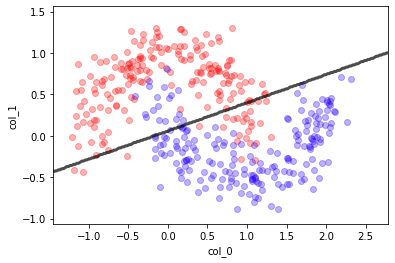

In [67]:
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(lr.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.xlabel("col_0"); plt.ylabel("col_1");

## Arboles de decision

El algoritmo supone que las fronteras pueden ser compuestas por tramos horizontales y verticales

In [68]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X,y)
y_preds = dt.predict(X)
dt.score(X,y)

0.9225

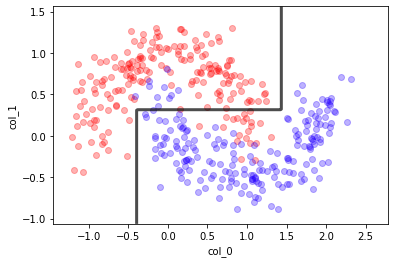

In [69]:
## KEEPOUTPUT
dt = DecisionTreeClassifier(max_depth=2); dt.fit(X,y) #A mas profundidad mas compleja
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.xlabel("col_0"); plt.ylabel("col_1");

Nota de como funciona

Las lineas son rectas porque cada decision es binaria

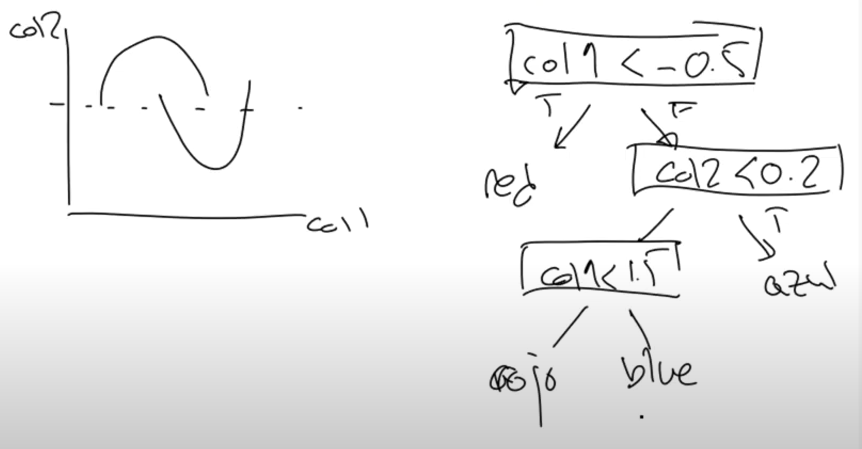

- **samples**: nb of data points in the split
- **value**: nb samples of each class in the split
- **class**: class assigned to the split (the majority class in **value**)

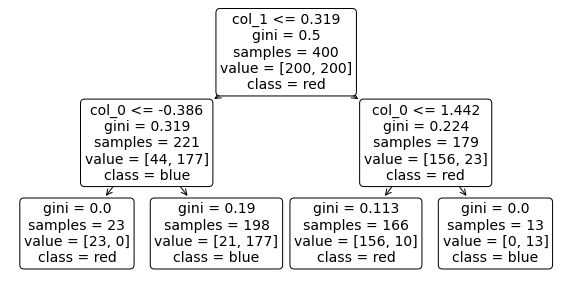

In [70]:
## KEEPOUTPUT
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(dt, feature_names=["col_0", "col_1"], class_names=["red", "blue"], rounded=True);

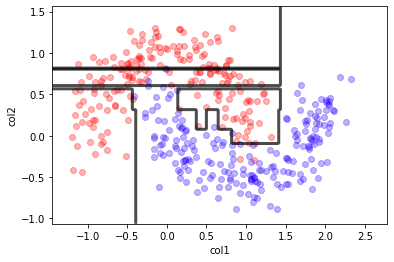

In [72]:
## KEEPOUTPUT
dt = DecisionTreeClassifier(max_depth=100); 
dt.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.xlabel("col1"); plt.ylabel("col2");

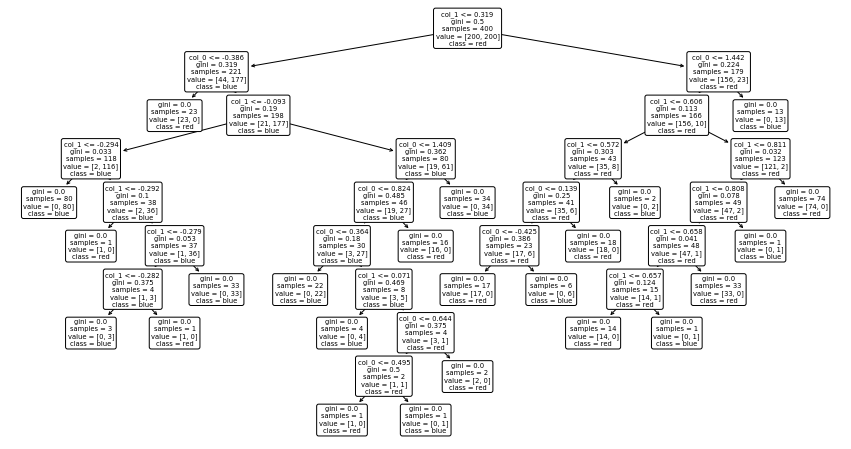

In [73]:
## KEEPOUTPUT
plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=["col_0", "col_1"], class_names=["red", "blue"], rounded=True);

In [74]:
X,y = make_circles(400, noise=0.05)

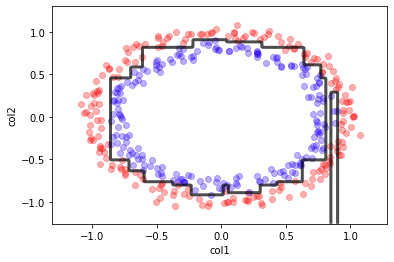

In [75]:
## KEEPOUTPUT
dt = DecisionTreeClassifier(max_depth=10); 
dt.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.xlabel("col1"); plt.ylabel("col2");

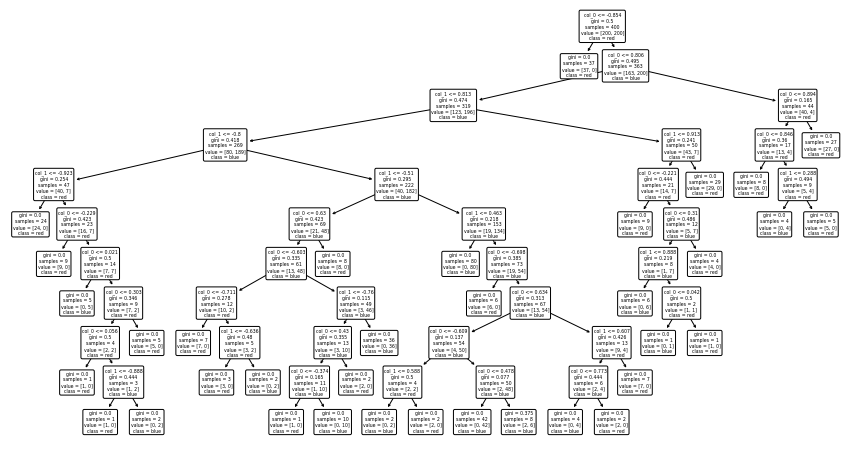

In [76]:
## KEEPOUTPUT
plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=["col_0", "col_1"], class_names=["red", "blue"], rounded=True);

## Random forests

Muchos arboles de decision
Meta estimador
Cada arbol es entrenado con un conjunto de datos diferente

0.8575 0.8575


(0.5889, 0.4111)

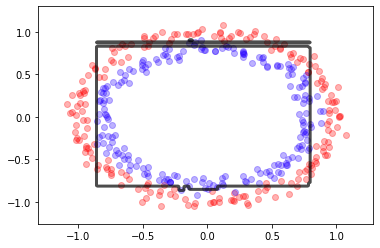

In [80]:
## KEEPOUTPUT
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=3) #10 arboles de profundidad maxima 3
rf.fit(X,y)
print (rf.score(X,y),rf.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(rf.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


0.995


(0.612, 0.388)

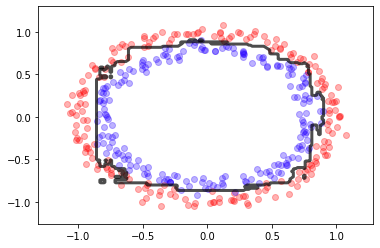

In [81]:
## KEEPOUTPUT
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10, n_estimators=100)
rf.fit(X,y)
print (rf.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(rf.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


## Naive Bayes

El algoritmo asume que cada columna viene de una distribucion Gaussiana distinta e independiente

(0.62405, 0.37595)

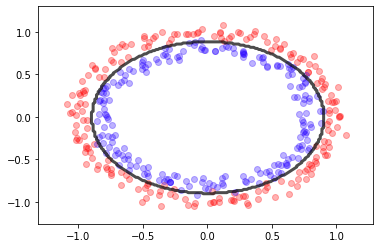

In [89]:
## KEEPOUTPUT
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


(0.662825, 0.337175)

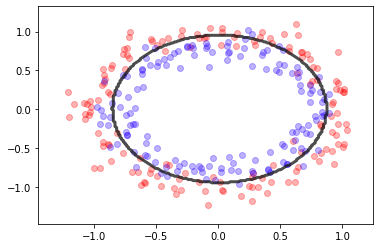

In [90]:
## KEEPOUTPUT
X,y = make_circles(300, noise=.1)
gb = GaussianNB()
gb.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


(0.5257, 0.4743)

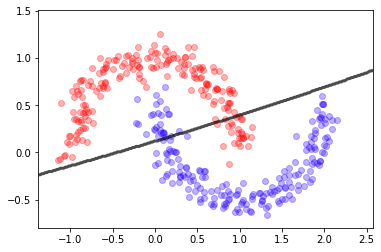

In [91]:
## KEEPOUTPUT
X,y = make_blobs(300, centers=2, cluster_std=2) #blobs son manchas de puntos
X, y = make_moons(400, noise=0.1)
gb = GaussianNB()
gb.fit(X,y)

mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


observa que si alguna de las variables no es independiente el método falla

/usr/local/lib/python3.8/dist-packages/scipy/stats/_multivariate.py:753: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


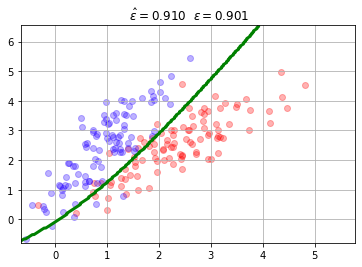

In [92]:
## KEEPOUTPUT
mc = mlutils.Example_Bayes2DClassifier(mean0=[2.5, 2.5], cov0=[[.9, .9], 
                                                               [0.8, 1.1]],
                                        mean1=[1, 2.5], cov1=[[0.5,.8],
                                                             [0.4,0.9]])
X,y = mc.sample(200)
mlutils.plot_2Ddata_with_boundary(mc.predict, X, y, line_width=3, line_color="green", dots_alpha=.3)
plt.title(" $\hat{\epsilon}=%.3f$"%mc.score(X,y)+"  $\epsilon=%.3f$"%mc.analytic_score());
plt.grid();


0.825


(0.606225, 0.393775)

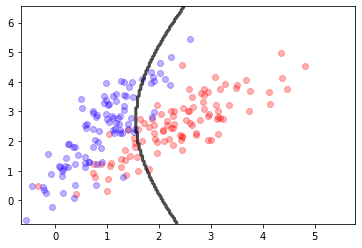

In [93]:
## KEEPOUTPUT
gb.fit(X,y)
print (gb.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
